<a href="https://colab.research.google.com/github/Patrick-Sinnott/Machine-Learning-Ising-Model/blob/main/Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(8000, 15, 15)
(8000,)


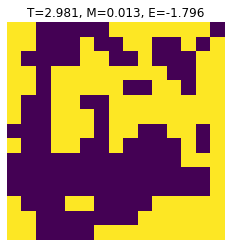

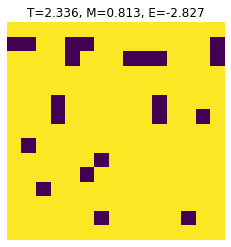

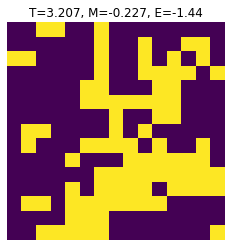

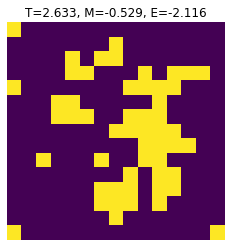

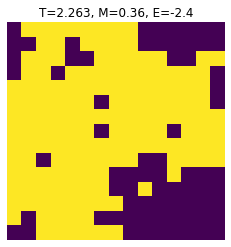

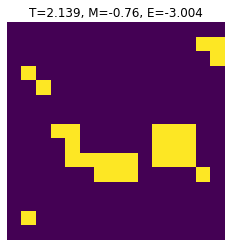

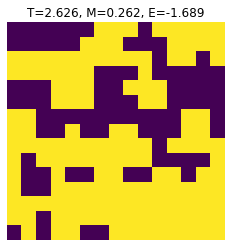

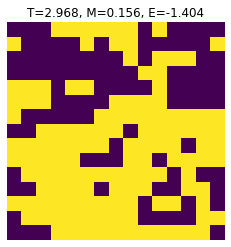

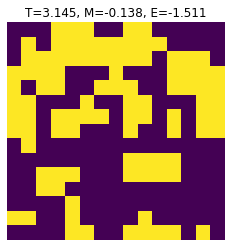

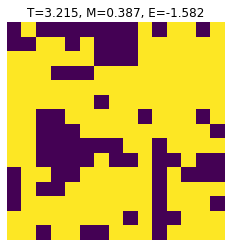

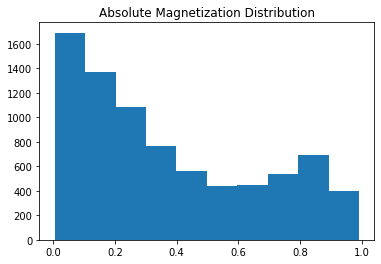

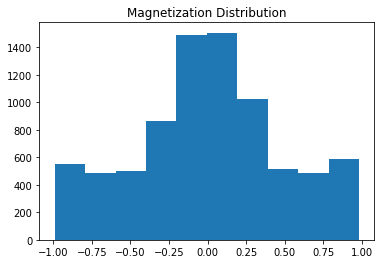

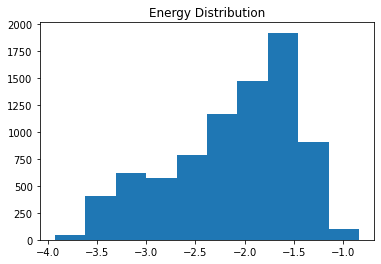

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def initialise(n):
    '''
    Function that initialises a lattice of either all spin or all spin down
         -INPUT:  
           (1) n: an int value for the size of square lattice
         -OUTPUT: 
           returns (n,n) numpy array representing lattice
         -NOTE:
           -if each lattice site is random spin up or down then weird artifacts form
            after many sweep 
           -randomly all up/down so that absolute magnetization distributions are correct
    '''  
    # prob of lattice being either up or down
    up_down_rand = np.random.rand()
    # 50% all spins are down
    if up_down_rand < 0.5:
      return np.ones(shape=(n,n), dtype=float) * -1.
    # 50% all spins are up
    else:
      return np.ones(shape=(n,n), dtype=float)

def erg(lattice):
    '''
    Function that calculates the energy per site (intensive) of given lattice
         -INPUT:  
           (1) lattice: an (N,N) array with values of [-1,+1] at each site
         -OUTPUT: 
           returns scalar value for average energy per site
    '''       
    x = lattice.shape[0]
    E = 0
    for p in range(x):
        for q in range(x):            
            S = lattice[p,q]
            neigh = lattice[(p+1)%x, q] + lattice[(p-1), q] + lattice[p,(q+1)%x] + lattice[p,(q-1)]
            E += -neigh*S
    return E/float(lattice.shape[0]**2)

def mag(lattice):
    '''
    Function that calculates the magnetization per site (intensive) of given lattice
         -INPUT:  
          (1) lattice: an (N,N) array with values of [-1,+1] at each site
         -OUTPUT: 
          returns scalar value for average magnetization per site
    '''
    L = lattice.shape[0]
    lattice = lattice.reshape(L,L)
    magnetization = np.sum(lattice)
    return magnetization/float(L**2)


def sweep(lattice, T):

  N = lattice.shape[0]

  for i in range(N):
    for j in range(N):
      spin = lattice[i,j]
      neigh = lattice[(i+1)%N, j] + lattice[(i-1), j] + lattice[i,(j+1)%N] + lattice[i,(j-1)]
      dE = 2 * neigh * spin
      if dE <= 0.:
        lattice[i,j] *= -1
      elif np.random.rand() < np.exp(-dE/T):
        lattice[i,j] *= -1

def gen_lats(N, eq_steps, t_low, t_high, num_samples):

  temps = np.random.uniform(t_low, t_high, N_samples)

  # Empty lists to be appended to and returned
  lats = []

  for i in range(num_samples):
    # Initialize lattice
    lat = initialise(N)
    t_i = temps[i]

    # Sweep lattice until equilibrium
    for _ in range(eq_steps):
      sweep(lat, t_i)

    lats.append(lat)
      
  return np.array(lats), temps

  #------------------------------- DATA-GENERATION -------------------------------

# Choose desired values of dataset
L = 15
eq_steps = 200
N_samples = 8000

# temperature range aroun T_crit=2.7
T_low = 2.1
T_high = 3.3

lats, temps = gen_lats(L, eq_steps, T_low, T_high, N_samples)

print(lats.shape)
print(temps.shape)

mags = np.array([mag(lat) for lat in lats])
enes = np.array([erg(lat) for lat in lats])


for i in range(10):
  plt.imshow(lats[i])
  plt.axis('off')
  plt.title('T={}, M={}, E={}'.format(np.round(temps[i],3),np.round(mags[i],3),np.round(enes[i],3)))
  plt.show()
  

# matplotlib histogram
plt.hist(abs(mags))
plt.title('Absolute Magnetization Distribution')
plt.show()
plt.hist(mags)
plt.title('Magnetization Distribution')
plt.show()
plt.hist(enes) # , color = 'blue', edgecolor = 'black', bins=10
plt.title('Energy Distribution')
plt.show()


from google.colab import drive
#drive.mount('/content/drive')
drive.mount('/content/drive')

np.savez_compressed('/content/drive/My Drive/for_patrick/data_{}k_[{},{}-{},{}]_L{}_EM.npz'.format(N_samples//1000, str(T_low)[0], str(T_low)[-1], str(T_high)[0], str(T_high)[-1], L), 
                    lattices=lats, 
                    temperatures=temps,      
                    energies=enes,
                    magnetizations=mags)
